*Import Libraries*

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
#For PreProcessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

/Users/agos/miniconda3/envs/echochambers/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Import file
input_file = '/Users/agos/Documents/Echo-Chambers/MyProject/Datasets/brexit_stances.tsv'
df = pd.read_csv(input_file, sep='\t', header=0, usecols=['tweets', 'stance'])
# specify GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
from Load import load
df = load()

In [14]:
from Preprocessing import split_tweets
df = split_tweets(df)
df.head()

,tweets,stance
0,One Ring to rule them all One Ring to find the...,1
1,"I'm going to ""Vote In - Another Europe Is Poss...",-1
1,WTF? Michael Gove now hates vested interests....,-1
1,Prof John Curtice’s poll of polls [bit late a...,-1
1,"""Corbyn wouldn't let me go to the Commons tuc...",-1


In [15]:
from Preprocessing import preprocess
labels = []
df = preprocess(df)
df.head()

/Users/agos/miniconda3/envs/echochambers/lib/python3.9/site-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...


/Users/agos/miniconda3/envs/echochambers/lib/python3.9/site-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Reading twitter - 1grams ...


,tweets,stance,Preprocessed
0,One Ring to rule them all One Ring to find the...,1,one ring to rule them all one ring to find the...
1,"I'm going to ""Vote In - Another Europe Is Poss...",2,i am going to vote in another europe is possib...
1,WTF? Michael Gove now hates vested interests....,2,wtf michael gove now hates vested interests wh...
1,Prof John Curtice’s poll of polls [bit late a...,2,prof john curtice s poll of polls bit late as ...
1,"""Corbyn wouldn't let me go to the Commons tuc...",2,corbyn would not let me go to the commons tuck...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/agos/miniconda3/envs/echochambers/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncatio

Loading BERT tokenizer...
Original:  one ring to rule them all one ring to find them one ring to bring them all and in the darkness bind them vote leave
Token IDs: tensor([  101,  2028,  3614,  2000,  3627,  2068,  2035,  2028,  3614,  2000,
         2424,  2068,  2028,  3614,  2000,  3288,  2068,  2035,  1998,  1999,
         1996,  4768, 14187,  2068,  3789,  2681,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,

/Users/agos/miniconda3/envs/echochambers/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


  Batch    40 of    44. Elapsed: 0:03:18.

  Average training loss: 0.60
  Training epoch took: 0:03:34

Running Validation...
  Accuracy: 0.86
  Validation Loss: 0.47
  Validation took: 0:00:06

======== Epoch 2 / 2 ========
Training...
  Batch    40 of    44. Elapsed: 0:03:11.

  Average training loss: 0.44
  Training epoch took: 0:03:27

Running Validation...
  Accuracy: 0.77
  Validation Loss: 0.81
  Validation took: 0:00:06

Training complete!
Total training took 0:07:14 (h:mm:ss)


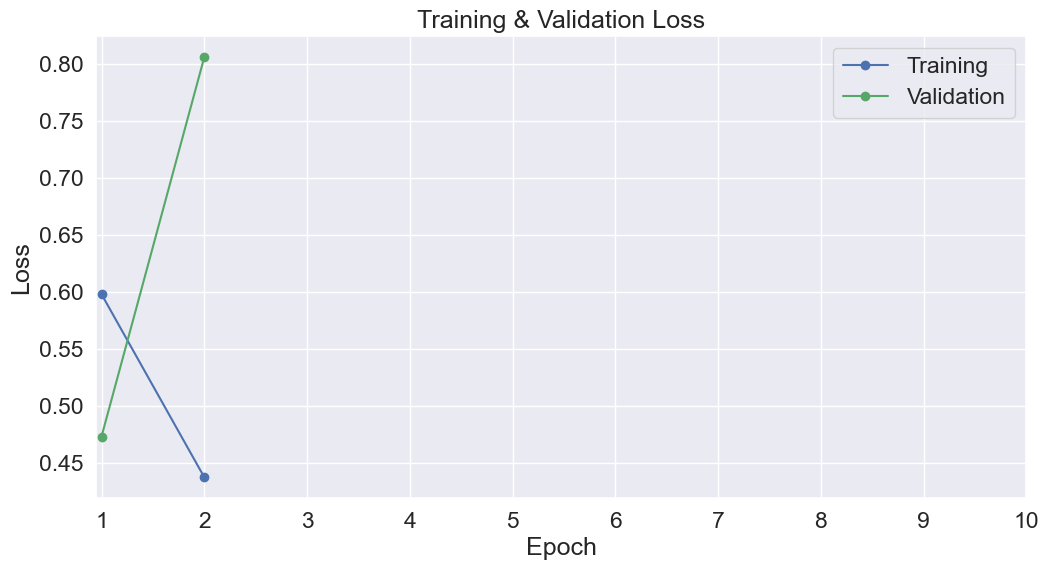

In [16]:
from Bert import bert_train
bert_train(df)

In [97]:
import pandas as pd
# Display floats with two decimal places. pd.set_option('precision', 2)
# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)
# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')
# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.554393,0.317857,0.923214,0:03:22,0:00:07
2,0.581063,0.269941,0.948214,0:03:11,0:00:06
3,0.514489,0.800734,0.512500,0:02:56,0:00:06
4,0.492949,0.516845,0.714286,0:03:01,0:00:06
5,0.522440,0.528872,0.728571,0:03:05,0:00:06
6,0.499855,0.306061,0.948214,0:02:56,0:00:06
7,0.418836,0.415646,0.857143,0:04:10,0:00:06
8,0.420407,0.337765,0.896429,0:03:15,0:00:06
9,0.403506,0.311520,0.908929,0:03:09,0:00:06


In [21]:
from Sentiment import sentiment_bertweet

In [ ]:
#Bertweet model
i = 20
sentiment = sentiment_bertweet(df['Preprocessed'].iloc[i])
print("Original tweet:", df['tweets'].iloc[i])
print(df['Preprocessed'].iloc[i])
print("Sentiment:", sentiment)

In [23]:
torch.max(sentiment[1], 1)

torch.return_types.max(
values=tensor([2.7035]),
indices=tensor([1]))